In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from dredFISH.Utils.__init__plots import * 

In [2]:
def recalc_tm(seq, fmd=0, Na=1e-5, dnac1=0, dnac2=0):
    """
    """
    res = mt.Tm_NN(seq, Na=Na, dnac1=dnac1, dnac2=dnac2)
    res = mt.chem_correction(res, fmd=fmd)
    return res
    
def get_gc(seq):
    """
    """
    return (seq.count('G') + seq.count('C'))/len(seq)

In [3]:
def diagnostic_panels(dfnew):
    """
    """
    fig, axs = plt.subplots(2, 3, figsize=(3*5,2*4))
    ax = axs[0,0]
    sns.scatterplot(data=dfnew, x='onscore', y='offscore', edgecolor='none', s=5, ax=ax,) 
    ax = axs[0,1]
    sns.histplot(dfnew['onscore'],  ax=ax, bins=100)
    ax.set_yscale('log')
    ax = axs[0,2]
    sns.histplot(np.log10(dfnew['offscore']+1), ax=ax, bins=100)
    ax.set_yscale('log')
    ax.set_xlabel('log10(offscore+1)')
    ax = axs[1,0]
    sns.histplot(dfnew['prob'], bins=100, ax=ax)
    ax = axs[1,1]
    sns.histplot(dfnew['maxkmer'], bins=20, ax=ax)
    ax.set_yscale('log')
    ax = axs[1,2]
    sns.scatterplot(data=dfnew, x='tm', y='gc', edgecolor='none', s=5, ax=ax) 
    ax.set_xticks([37, 40, 45, 50, 52])
    fig.tight_layout()

In [4]:
pth = './data/mm10/'
!ls $pth
# all: DNA FISH probes
# refseq: RNA FISH (isoform-resolved)
# iso: RNA FISH (isoform-flattened)

mm10_all_newBalance.tsv  mm10_iso_newBalance.tsv  mm10_refseq_newBalance.tsv
mm10_all_newBalance.zip  mm10_iso_newBalance.zip  mm10_refseq_newBalance.zip


In [5]:
# !wc -l $pth"mm10_all_newBalance.tsv"
# !wc -l $pth"mm10_refseq_newBalance.tsv"
# !wc -l $pth"mm10_iso_newBalance.tsv"

In [6]:
# start with isoflat

In [7]:
f = os.path.join(pth, 'mm10_iso_newBalance.tsv')
header=[
    'chrom', 'start', 'end', # one based?
    'seq', 
    'tm', 
    'onscore',  # 0-100
    'offscore', # 0-10,000
    'repeat',
    'prob',
    'maxkmer',
    'strand',
    'gname',
    'transcripts',
]
df = pd.read_csv(f, sep="\t", header=None)
df.columns = header
df['len'] = df['end']-df['start']+1
df['gc'] = df['seq'].apply(get_gc) 
df

,chrom,start,end,seq,tm,onscore,offscore,repeat,prob,maxkmer,strand,gname,transcripts,len,gc
0,chr1,3214511,3214543,AAAAGCACCATGACCAAGGACACCGAAAACAGA,42.18,100.000,0.000,0,0.423,25,+,Xkr4,1,33,0.454545
1,chr1,3214544,3214574,AAGCGGGAATGTTTACTTGCTGTGTGGAGGT,42.07,100.000,0.000,0,0.343,2,+,Xkr4,1,31,0.483871
2,chr1,3214624,3214660,TACAAATCTTAGCTGATGGAGTGGTAAGCCCTCAAGC,42.29,100.000,0.000,0,0.176,0,+,Xkr4,1,37,0.459459
3,chr1,3214679,3214715,AATGGCATACACATTGCATCTGTATGCTCTCACTTGC,42.18,100.000,0.000,0,0.140,3,+,Xkr4,1,37,0.432432
4,chr1,3214738,3214774,AGTAGACACATCATTTTGACCTTGGATGGGAAGAGGG,42.19,100.000,0.000,0,0.192,2,+,Xkr4,1,37,0.459459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175766,chrY,90839212,90839243,GCCTGGCATCATAGCTTTTGGCAGACTTCAGT,42.44,100.000,193.780,0,0.237,3,+,G530011O06Rik,1,32,0.500000
1175767,chrY,90839244,90839280,TCTGAGGTTCTGGAACAAGTCAGTCGTTAAGAGGACC,42.94,100.000,200.000,0,0.144,4,+,G530011O06Rik,1,37,0.486486
1175768,chrY,90839284,90839319,ACTCCACTCATTCTATTATCACACCAGACAGGTGCC,42.04,99.746,199.492,0,0.119,4,+,G530011O06Rik,1,36,0.472222
1175769,chrY,90839320,90839353,TCAGAGACACAGAGATGAGACAGGAGTCCACAGT,42.32,88.791,183.666,0,0.169,6,+,G530011O06Rik,1,34,0.500000


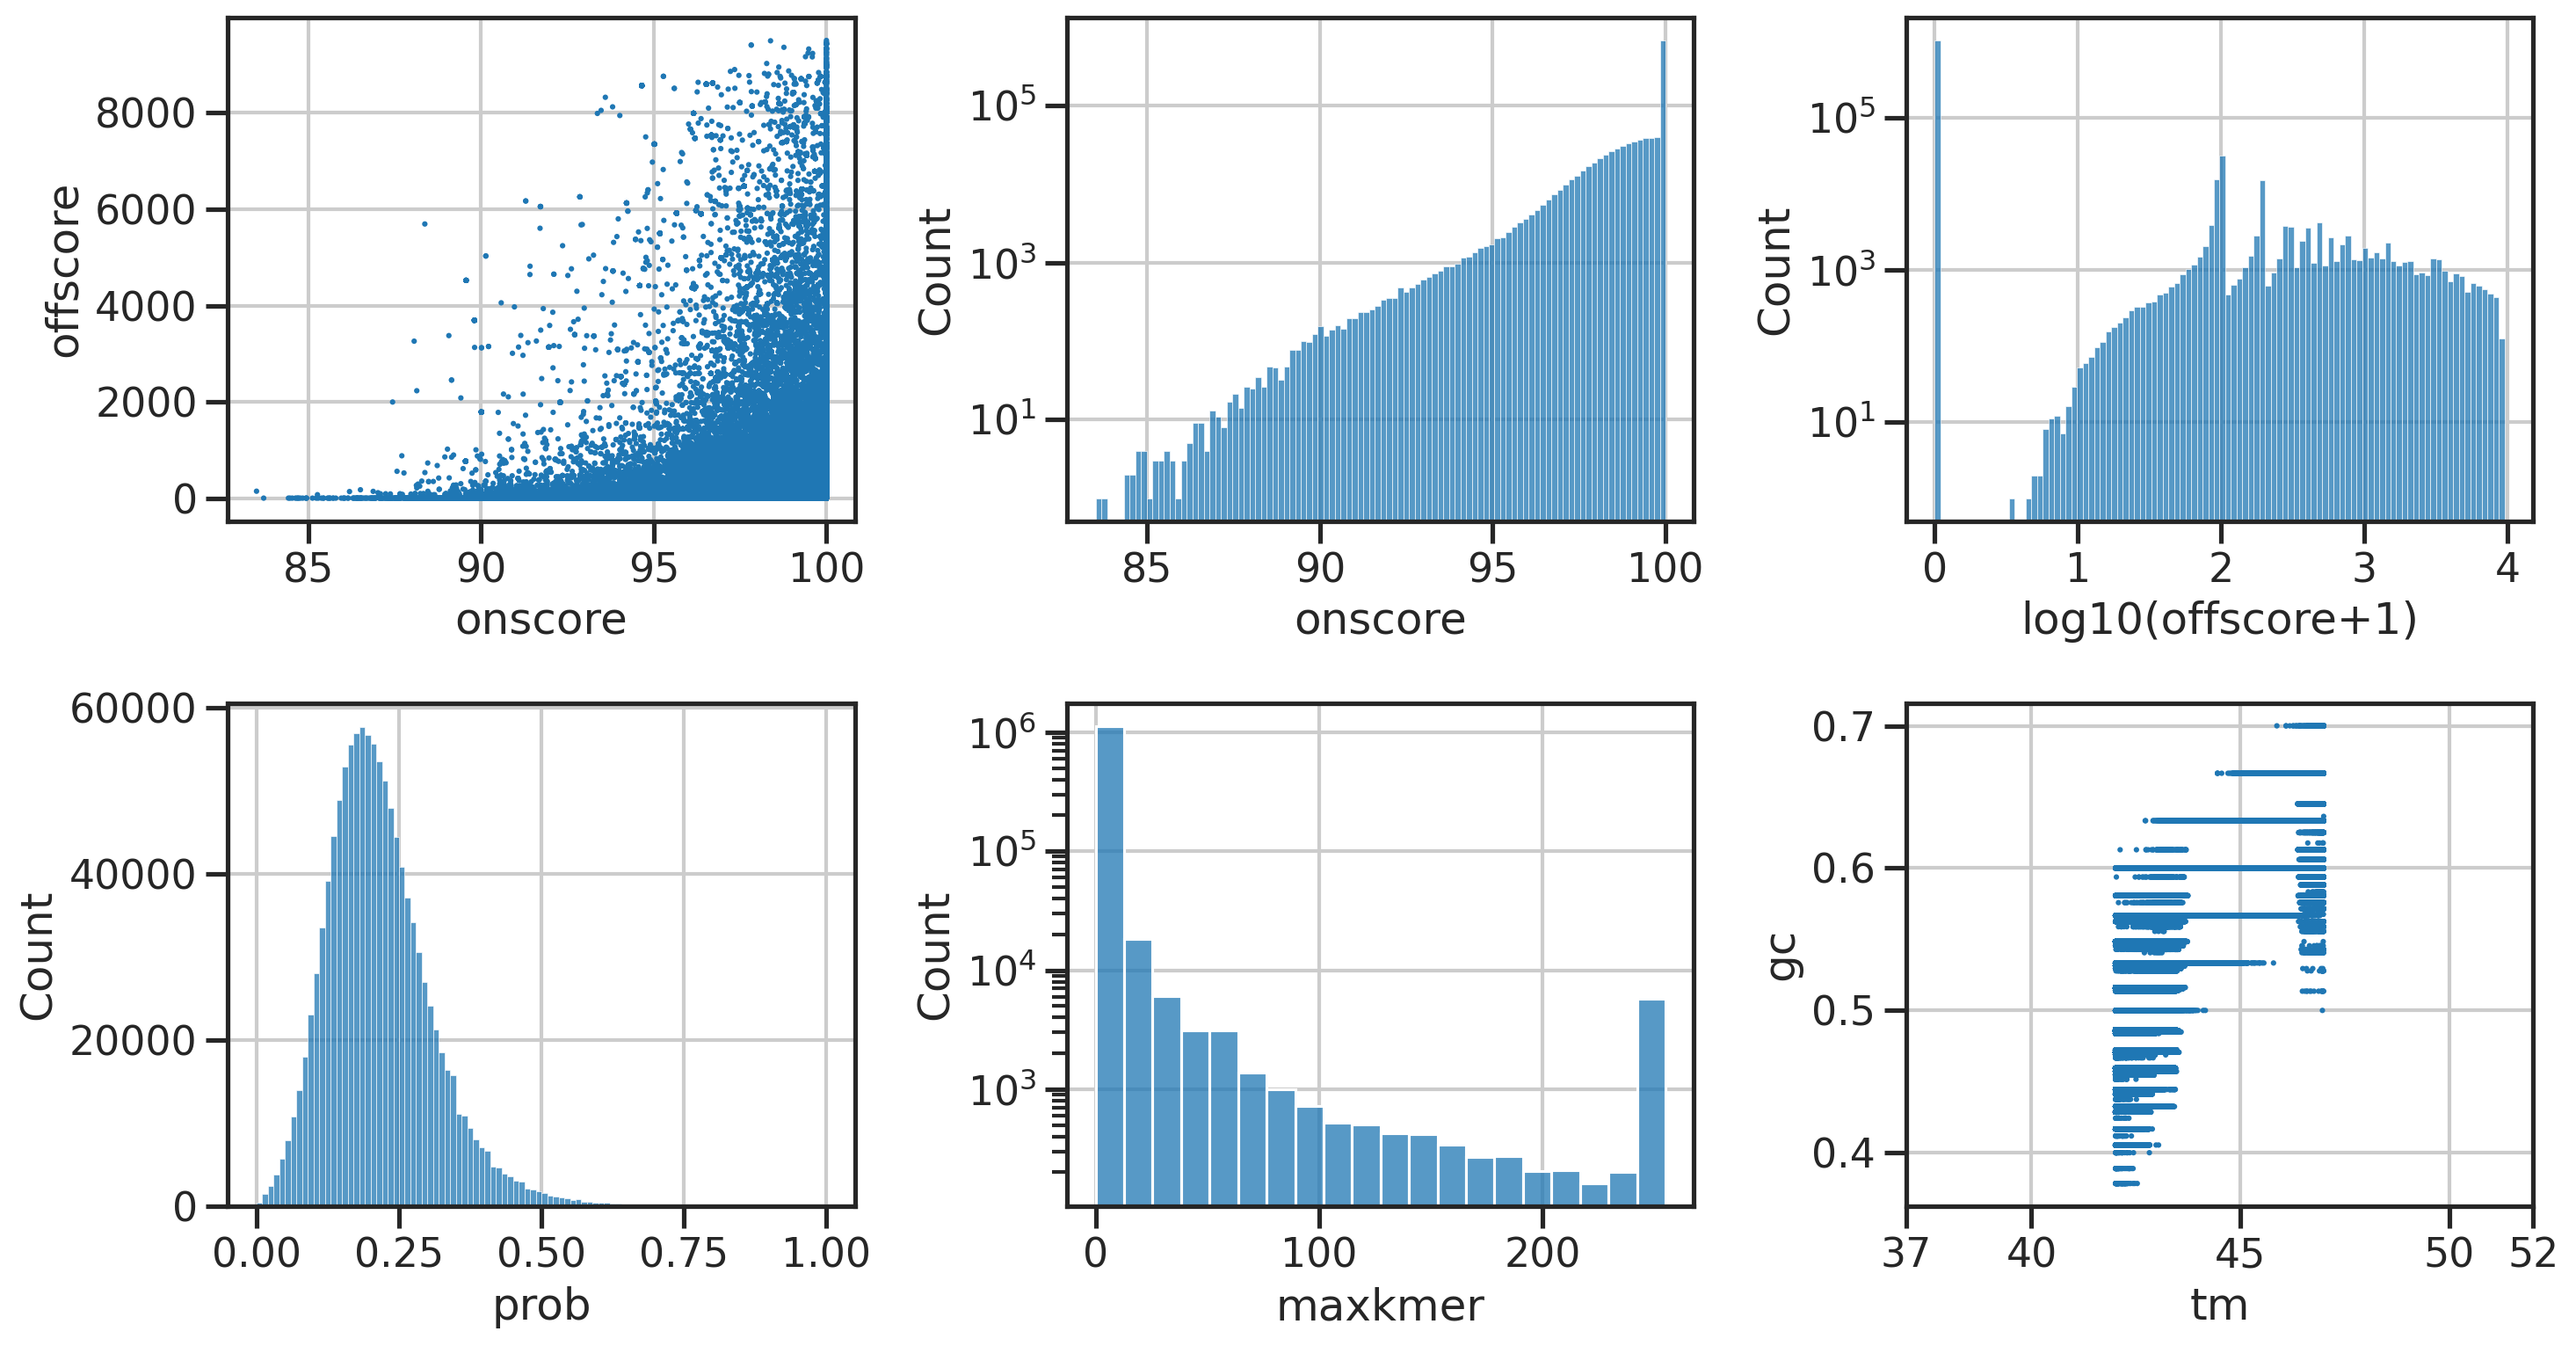

In [8]:
diagnostic_panels(df)

In [9]:
df.describe()

,start,end,tm,onscore,offscore,repeat,prob,maxkmer,transcripts,len,gc
count,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06
mean,7.693484e+07,7.693487e+07,4.347671e+01,9.925802e+01,8.405039e+01,6.807448e-02,2.165928e-01,4.090359e+00,1.766804e+00,3.280189e+01,5.321689e-01
std,4.445241e+07,4.445241e+07,1.579238e+00,1.283976e+00,4.991625e+02,2.518738e-01,9.529322e-02,2.059826e+01,1.540581e+00,2.954403e+00,7.098954e-02
min,2.061730e+05,2.062090e+05,4.201000e+01,8.350200e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,3.783784e-01
25%,3.779265e+07,3.779268e+07,4.229000e+01,9.888900e+01,0.000000e+00,0.000000e+00,1.520000e-01,0.000000e+00,1.000000e+00,3.000000e+01,4.594595e-01
50%,7.578560e+07,7.578563e+07,4.273000e+01,1.000000e+02,0.000000e+00,0.000000e+00,2.040000e-01,2.000000e+00,1.000000e+00,3.200000e+01,5.312500e-01
75%,1.106183e+08,1.106183e+08,4.442000e+01,1.000000e+02,0.000000e+00,0.000000e+00,2.670000e-01,2.000000e+00,2.000000e+00,3.600000e+01,6.000000e-01
max,1.951767e+08,1.951767e+08,4.699000e+01,1.000000e+02,9.504485e+03,1.000000e+00,1.000000e+00,2.550000e+02,6.600000e+01,3.700000e+01,7.000000e-01


In [10]:
dfnew = df.copy()
print("Raw", f"{len(dfnew):,}")

cond = dfnew['repeat']==0
dfnew = dfnew[cond]
print("Repeat regions removed", f"{len(dfnew):,}")

dfnew2 = dfnew.copy()
cond = dfnew2['offscore']<50
dfnew2 = dfnew2[cond]
print("Offscore filtered", f"{len(dfnew2):,}")

cond = dfnew2['onscore']>97
dfnew2 = dfnew2[cond]
print("Onscore filtered", f"{len(dfnew2):,}")

cond = dfnew2['maxkmer']<=10
dfnew2 = dfnew2[cond]
print("Max Kmer filtered", f"{len(dfnew2):,}")

cond = dfnew2['prob']<=0.5
dfnew2 = dfnew2[cond]
print("Secondary prob filtered", f"{len(dfnew2):,}")

Raw 1,175,771
Repeat regions removed 1,095,731
Offscore filtered 974,986
Onscore filtered 918,084
Max Kmer filtered 910,741
Secondary prob filtered 902,217


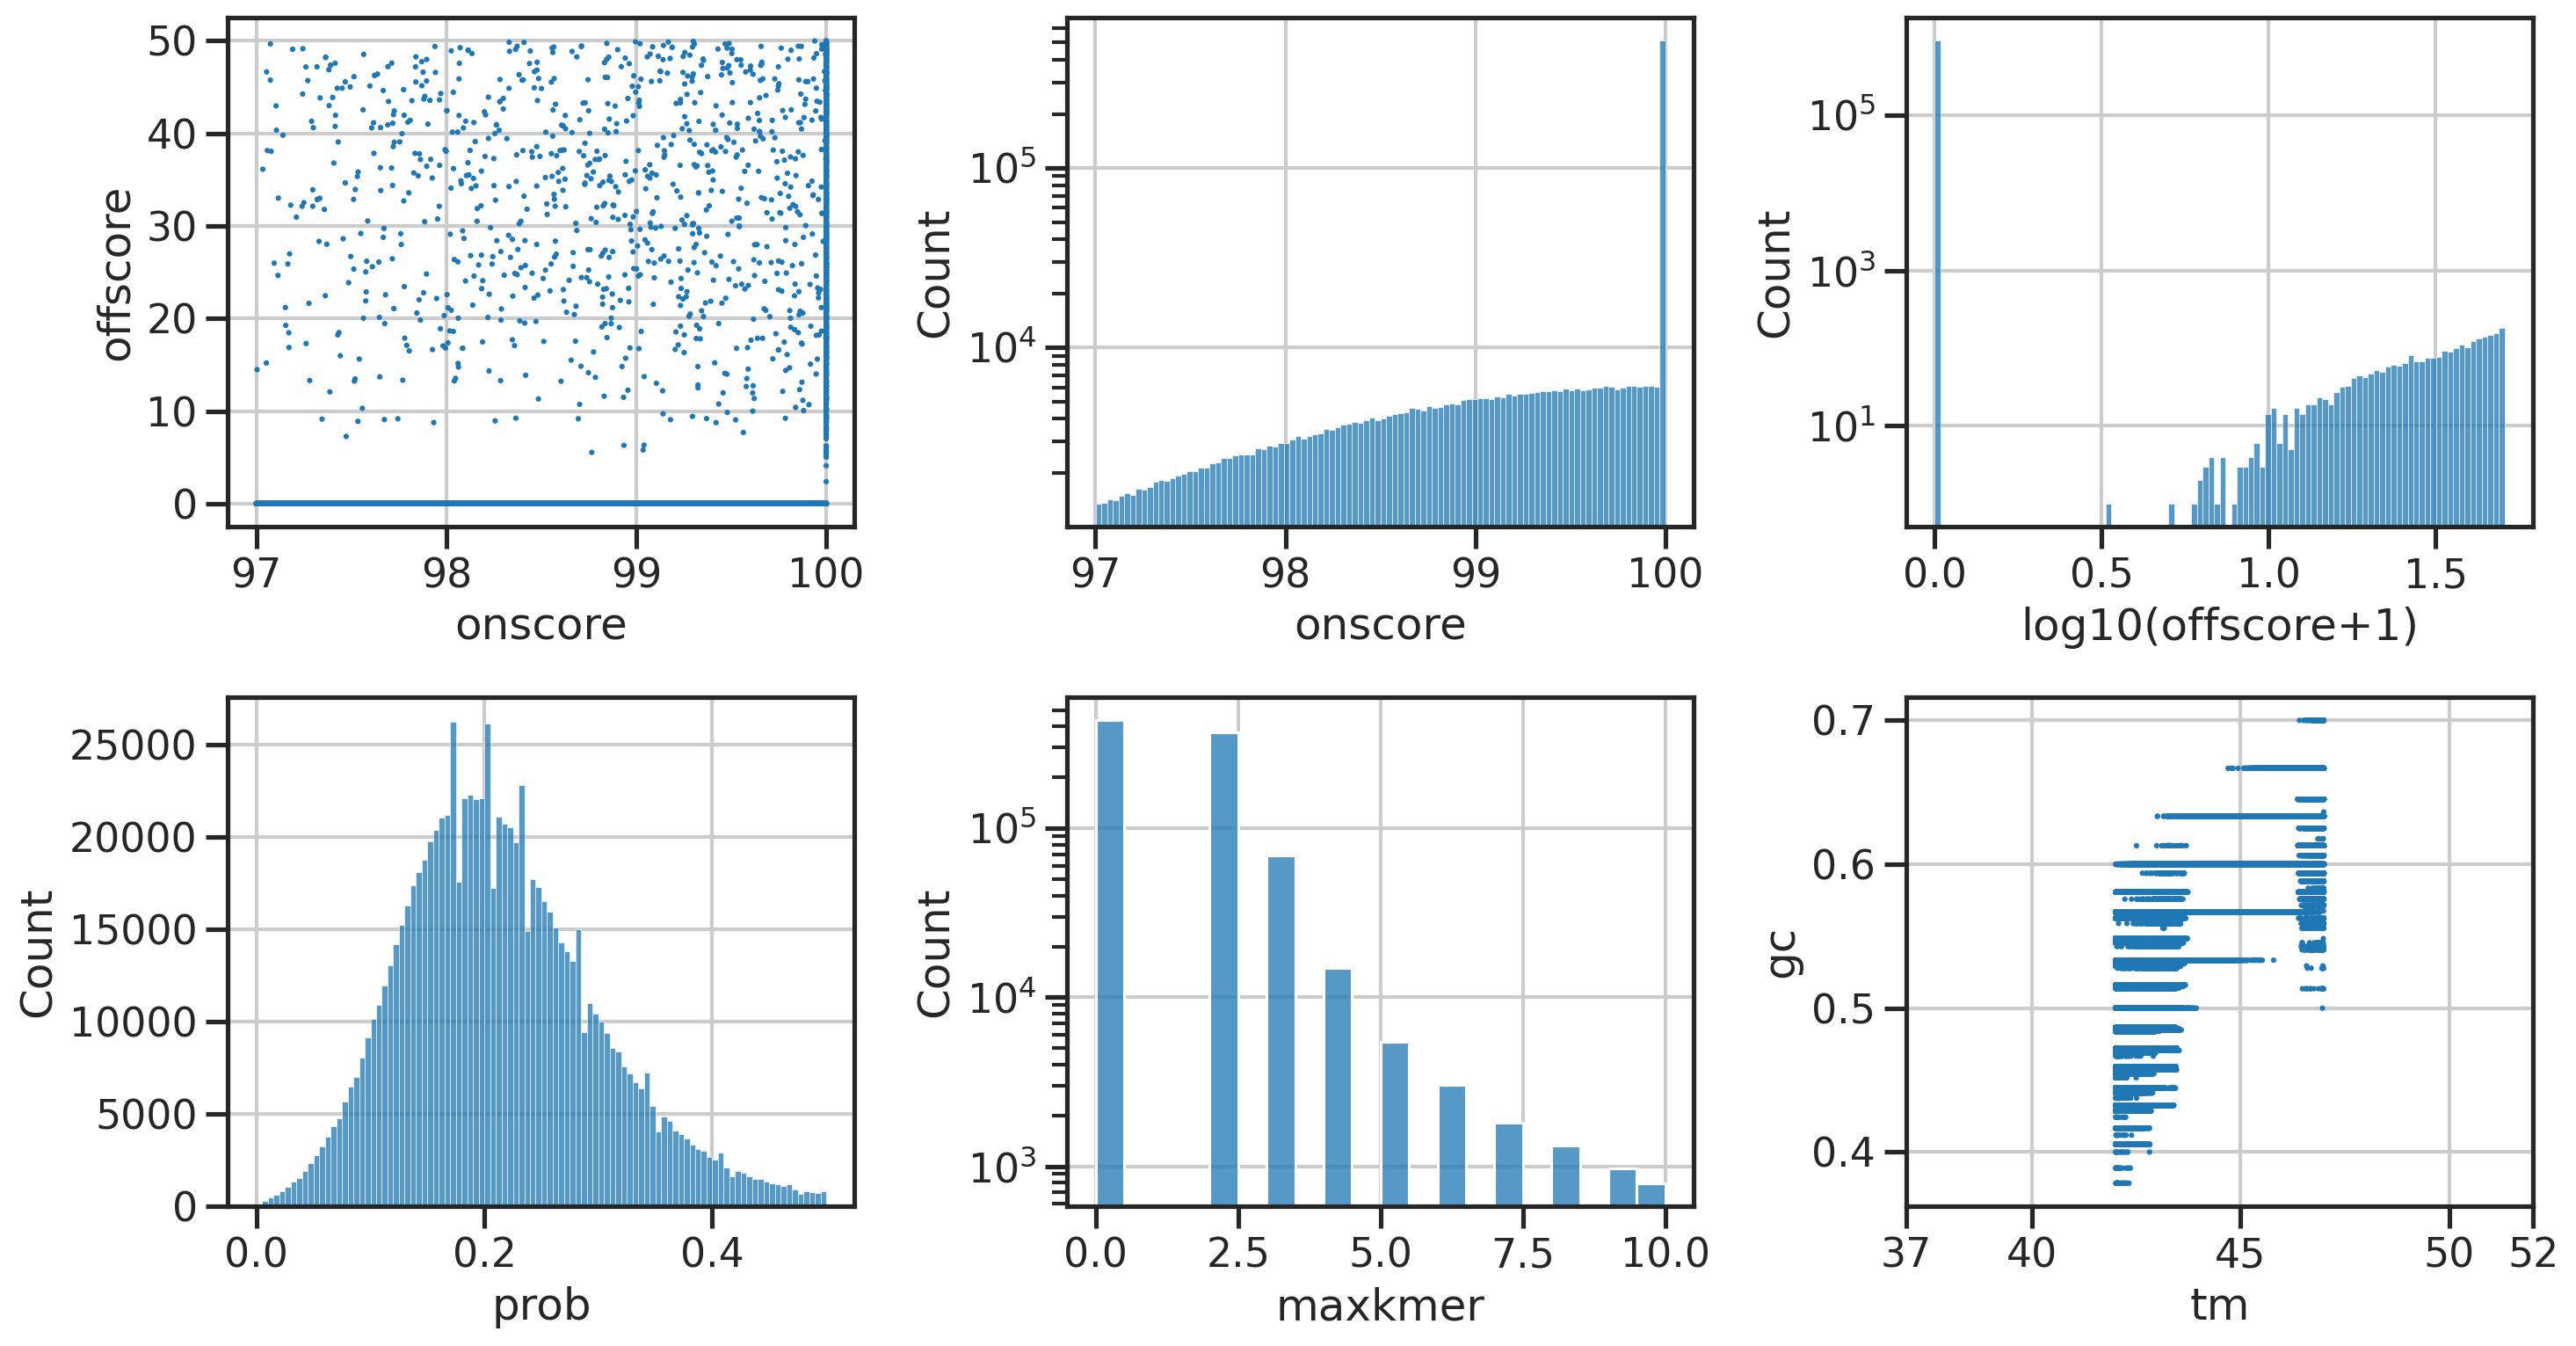

In [11]:
diagnostic_panels(dfnew2)

In [12]:
counts = dfnew2.groupby('gname').size().to_frame('pshop_nb')
counts

,pshop_nb
gname,
0610005C13Rik,22
0610009B22Rik,8
0610009E02Rik,9
0610009L18Rik,10
0610010F05Rik,21
...,...
Zyx,33
Zzef1,214
Zzz3,55


In [13]:
output = "./data/mm10_isoflat_counts_filtered_Oct26.csv"
counts.to_csv(output, header=False, index=True)
!head $output

0610005C13Rik,22
0610009B22Rik,8
0610009E02Rik,9
0610009L18Rik,10
0610010F05Rik,21
0610010K14Rik,11
0610012G03Rik,19
0610030E20Rik,63
0610031O16Rik,12
0610038B21Rik,27


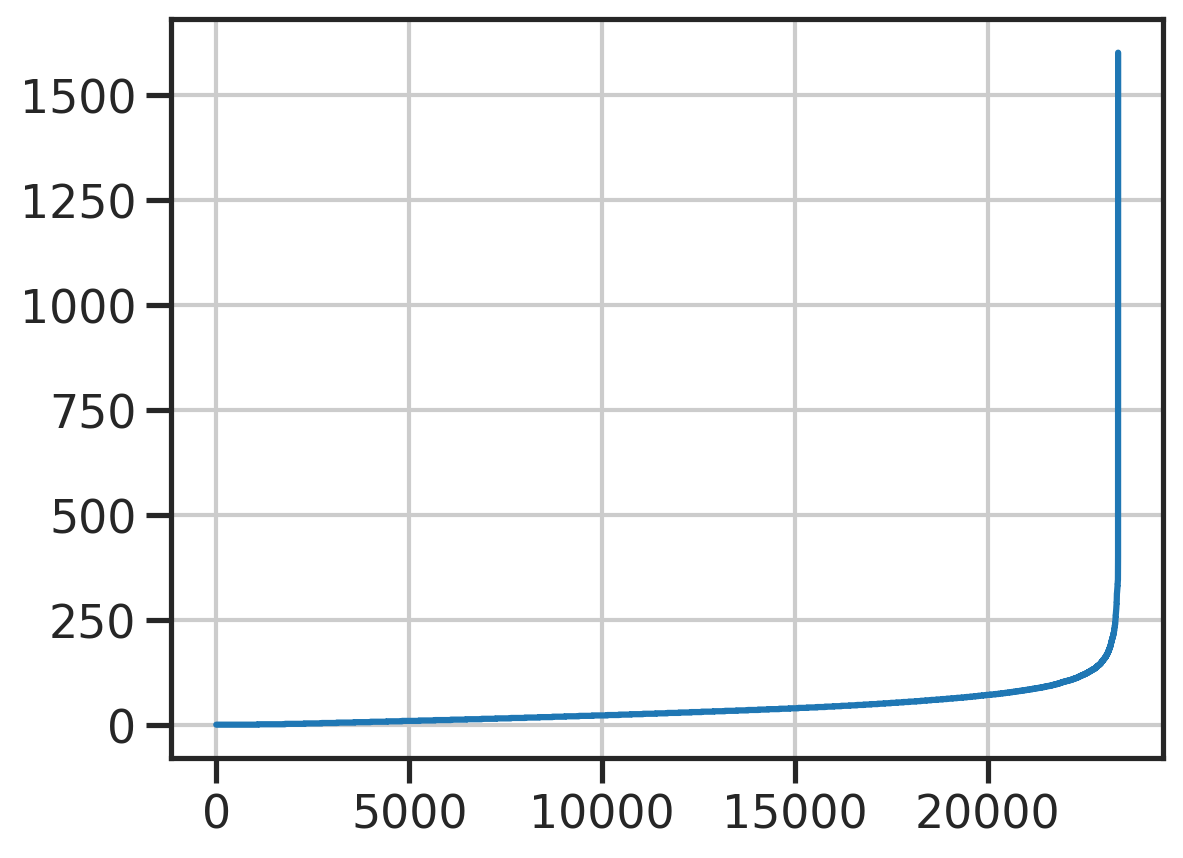

In [14]:
plt.plot(np.sort(counts['pshop_nb'].values))

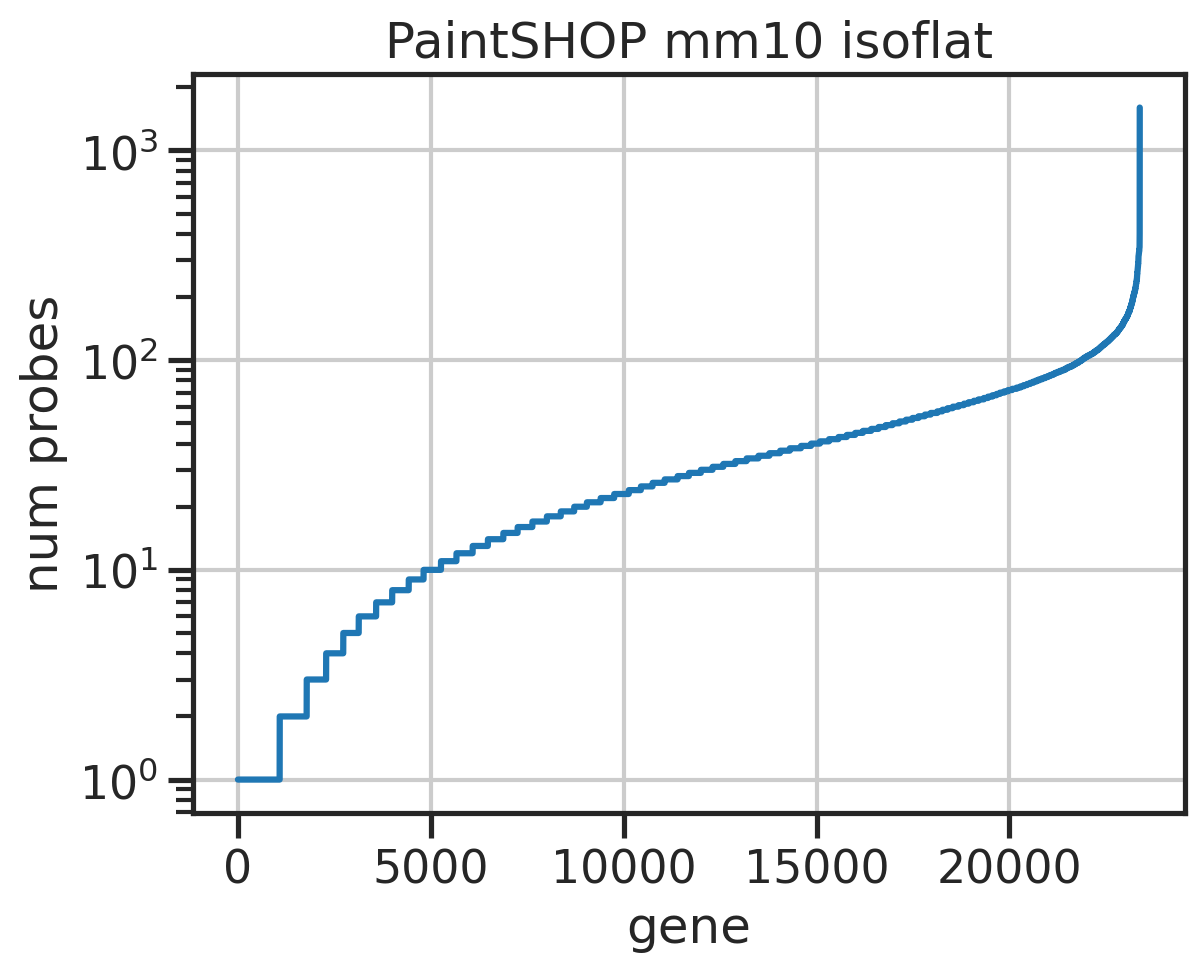

In [15]:
plt.plot(np.sort(counts['pshop_nb'].values))
plt.xlabel('gene')
plt.ylabel('num probes')
plt.title('PaintSHOP mm10 isoflat')

plt.yscale('log')